# Comparison between different algorithms for calculating the magnetic field produced by elipsoids

The magnetic induction field produced by elipsoids can be calculated by different algorithms, depending on the shape of the elipsoid. Emerson et al. (1985) proposed algorithms for calculating the magnetic field produced by prolate and oblates elipsoids. Clark et al.(1986) proposed algorithms for calculating the magnetic field produced by triaxial elipsoids.

This code compares the magnetic field produced by a triaxial elipsoid approximated to a oblate elipsoid (semi-axis a and c with equal values) with the Emerson's oblate elipsoid.


* Emerson, D. W., Clark, D., and Saul, S. (1985). Magnetic exploration models incorporating remanence, demagnetization and anisotropy: Hp 41c handheld computer algorithms. Exploration Geophysics, 16(1):1–122.
* Clark, D., Saul, S., and Emerson, D. (1986). Magnetic and gravity anomalies of a triaxial ellipsoid. Exploration Geophysics, 17(4):189–200.

### Required dependencies

In [1]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

from fatiando.gravmag import sphere
from fatiando import mesher, gridder, utils
from fatiando.vis import mpl

%matplotlib inline

### Auxiliary functions

In [2]:
import Modelagem_Elipsoide_Emerson_Oblate as me2
import Elipsoide_Clark_FAT_Unificado as me5

### Computation points

In [3]:
# Malha coordenadas geograficas
xmin = -1000.
xmax = 1000.
ymin = -900.
ymax = 900.
Nx = 200
Ny = 200

In [4]:
# Create a regular grid at 0m height
shape = (Nx, Ny)
area = [xmin, xmax, ymin, ymax]
Xp, Yp, Zp = gridder.regular(area, shape, z=0.)

### Geomagnetic field

In [5]:
# Set the inclination and declination of the regional field
inten, inc, dec  = 60000., 90., 0.

### Center of the ellipsoid

In [6]:
#xc posicao x , yc posição y e zc profundidade reais
xc = 0.
yc = 0.
zc = 100.

### Remanent magnetization and susceptibility tensor

In [7]:
#vetor magnetização remanente
intensity = 10000.
inclirem = 90.
declirem = 0.

#vetor de susceptibilidades
intensidadeA = 0.10
inclinacaoA = 90.
declinacaoA = 0.
intensidadeB = 0.10
inclinacaoB = 180.
declinacaoB = 0.
intensidadeC = 0.10
inclinacaoC = 0.
declinacaoC = 90.
k = np.array([[intensidadeA,inclinacaoA,declinacaoA],
              [intensidadeB,inclinacaoB,declinacaoB],
              [intensidadeC,inclinacaoC,declinacaoC]])

### Ellipsoid orientation 

In [8]:
# Orientacoes do elipsoide
azimuth = 0.
delta = 0.
gamma = 0.

### Reference axis and axis difference

In [9]:
daxis = 20.
aref = 50.

# Fatiando a Terra - Ellipsoid Clark

In [10]:
# Ellipsoid axis
a = aref
b = aref - 0.01
c = aref - 0.02

################################################################################################################################

# Create a ellipsoid model
model = [me5.Ellipsoid(Xp, Yp, Zp, xc, yc, zc, a, b, c, azimuth, delta, gamma,
                      {'remanence': np.array([10000, 90., 0.]),
                       'k1': np.array([0.1, 90., 0.]),
                       'k2': np.array([0.1, 180., 0.]),
                       'k3': np.array([0.1, 0., 90.])}
                      )]

# Calculate the anomaly for a given regional field
JRD_cart = me5.jrd_cartesiano (inten,inc,dec,model)
Bx = me5.bx_c (Xp,Yp,Zp,inten,inc,dec,model)
By = me5.by_c (Xp,Yp,Zp,inten,inc,dec,model)
Bz = me5.bz_c (Xp,Yp,Zp,inten,inc,dec,model)
Tf = me5.tf_c (Xp,Yp,Zp,inten,inc,dec,model)
print JRD_cart

[[11276.507656677659, 90.0, -9.9442872292757939e-19]]


# Implementation  - Ellipsoid Emerson Prolate

In [11]:
# Ellipsoid axis
a = aref - 0.001
b = aref

Bx_O, By_O, Bz_O,Tf_O = me2.elipsoide (Xp,Yp,Zp,xc,yc,zc,a,b,azimuth,delta,declirem,inclirem,intensity,dec,inc,inten,k)

## Resultado da minha função

C:\Anaconda2\lib\site-packages\matplotlib\tri\triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


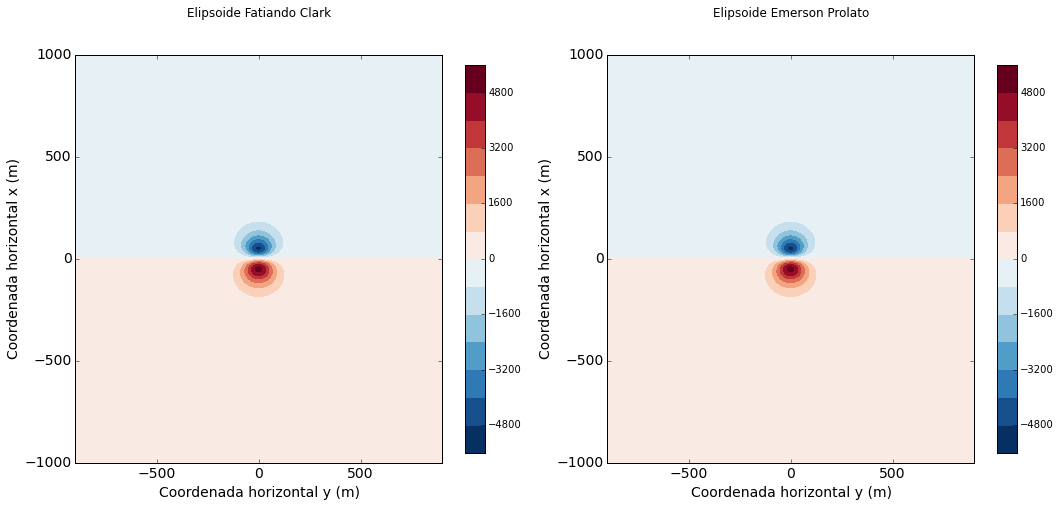

In [12]:
rangesBx = np.max(np.abs([np.max(Bx), np.min(Bx),
                          np.max(Bx_O), np.min(Bx_O)]))

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Elipsoide Fatiando Clark', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bx,15,
            vmin = -rangesBx, vmax = rangesBx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Elipsoide Emerson Prolato', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bx_O,15,
            vmin = -rangesBx, vmax = rangesBx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.tight_layout()

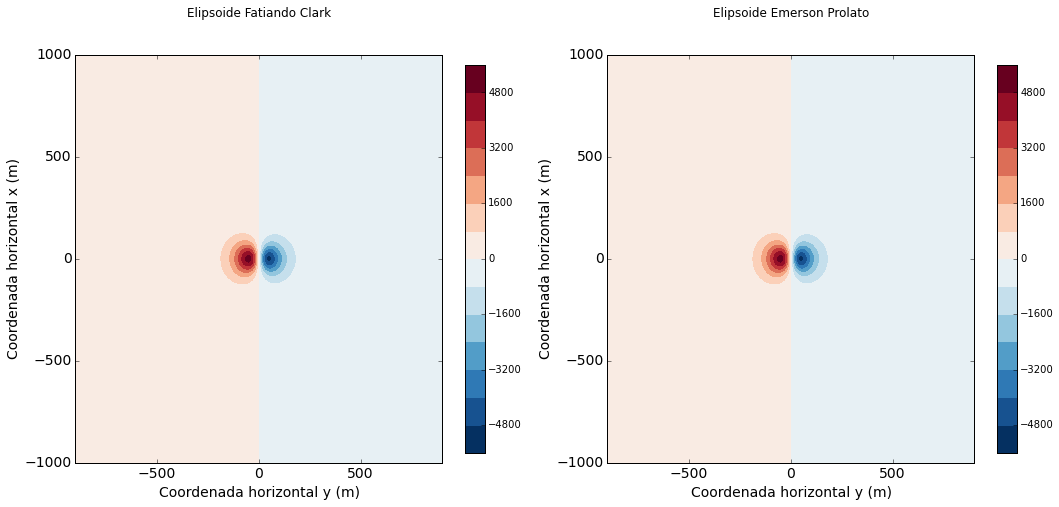

In [13]:
rangesBy = np.max(np.abs([np.max(By), np.min(By),
                          np.max(By_O), np.min(By_O)]))

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Elipsoide Fatiando Clark', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,By,15,
            vmin = -rangesBy, vmax = rangesBy,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Elipsoide Emerson Prolato', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,By_O,15,
            vmin = -rangesBy, vmax = rangesBy,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.tight_layout()

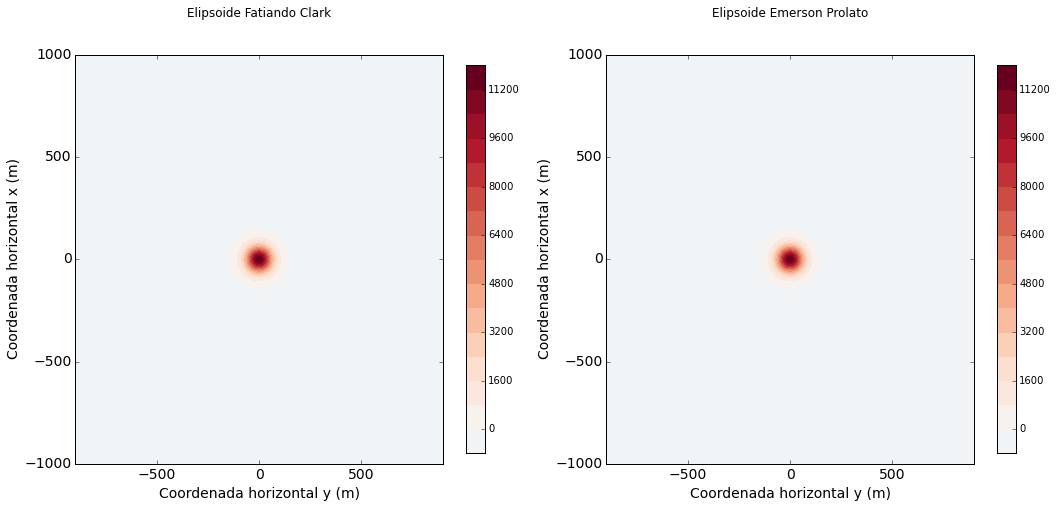

In [14]:
rangesBz = np.max(np.abs([np.max(Bz), np.min(Bz),
                          np.max(Bz_O), np.min(Bz_O)]))

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Elipsoide Fatiando Clark', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bz,15,
            vmin = -rangesBz, vmax = rangesBz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Elipsoide Emerson Prolato', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bz_O,15,
            vmin = -rangesBz, vmax = rangesBz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.tight_layout()

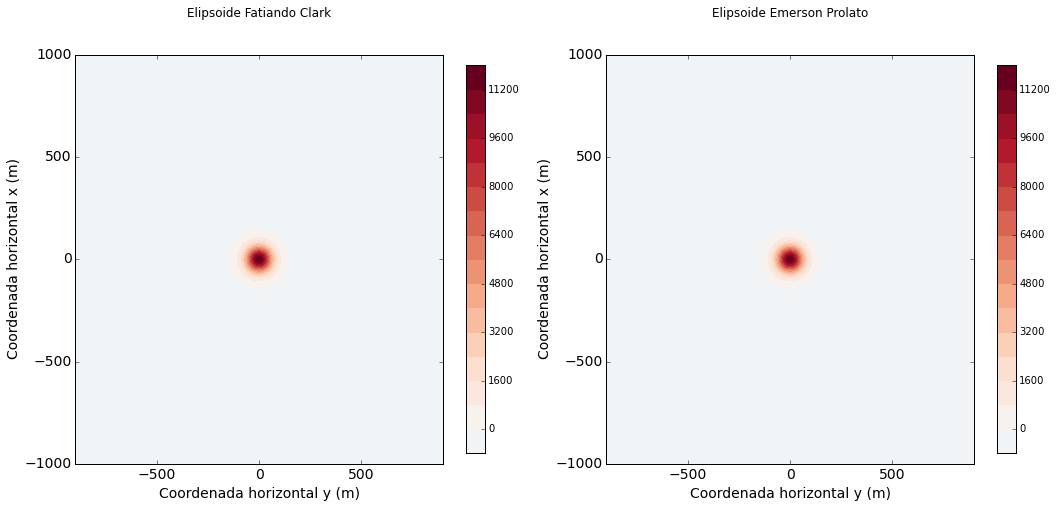

In [15]:
rangesTf = np.max(np.abs([np.max(Tf), np.min(Tf),
                          np.max(Tf_O), np.min(Tf_O)]))

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Elipsoide Fatiando Clark', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Tf,15,
            vmin = -rangesTf, vmax = rangesTf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Elipsoide Emerson Prolato', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Tf_O,15,
            vmin = -rangesTf, vmax = rangesTf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.tight_layout()